In [2]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import table

server_name = 'MBLaptop'
database_name ='AdventureWorks2022'


db_uri = f'mssql+pyodbc://{server_name}/{database_name}?driver=SQL+Server&Trusted_Connections=yes'


Ansluten till databasen


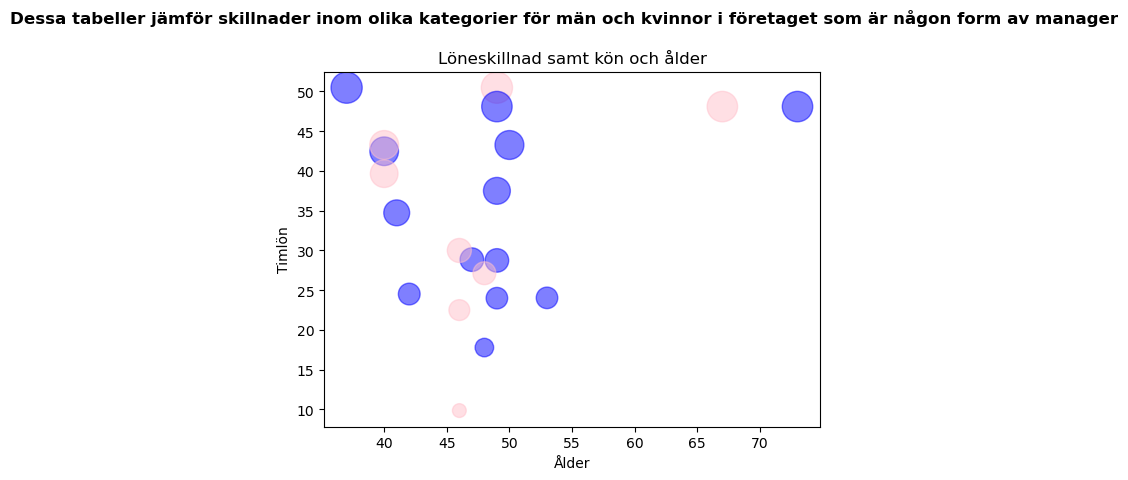

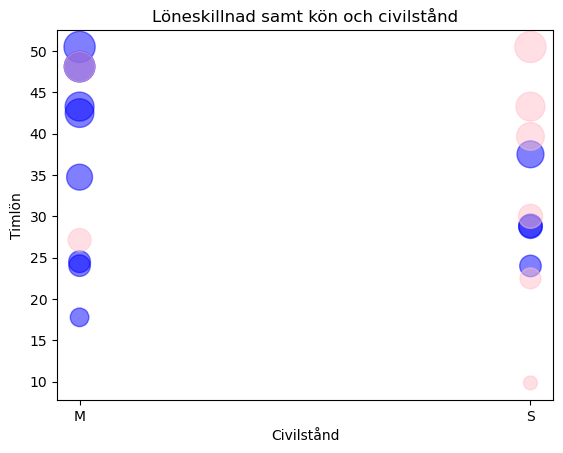

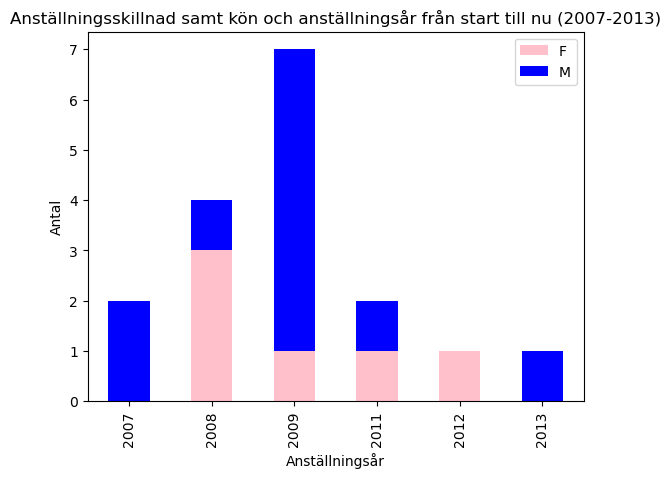

Anslutningen stängd


In [3]:
try:
    engine = create_engine(db_uri)
    connection = engine.connect()

    
    print("Ansluten till databasen")
    
    
    employee_salary_diff = """
    SELECT E.BusinessEntityID, p.FirstName, p.LastName, e.Gender, eh.Rate,
    DATEDIFF(YEAR, e.Birthdate, GETDATE()) AS Age
    FROM HumanResources.Employee AS e
    JOIN Person.Person AS p ON e.BusinessEntityID = p.BusinessEntityID
    LEFT JOIN HumanResources.EmployeePayHistory AS eh ON e.BusinessEntityID = eh.BusinessEntityID
    WHERE e.CurrentFlag = 1 AND e.JobTitle LIKE '%Manager%'
    ORDER BY e.BusinessEntityID;
    """
    
    employee_marital_diff = """
    SELECT E.BusinessEntityID, p.FirstName, p.LastName, e.Gender, eh.Rate,
    DATEDIFF(YEAR, e.Birthdate, GETDATE()) AS Age,
    e.MaritalStatus
    FROM HumanResources.Employee AS e
    JOIN Person.Person AS p ON e.BusinessEntityID = p.BusinessEntityID
    LEFT JOIN HumanResources.EmployeePayHistory AS eh ON e.BusinessEntityID = eh.BusinessEntityID
    WHERE e.CurrentFlag = 1 AND e.JobTitle LIKE '%Manager%'
    ORDER BY e.BusinessEntityID;
    """
    
    employee_gender_diff = """
    SELECT e.Gender, YEAR(e.HireDate) AS HireYear, COUNT(*) AS Total
    FROM HumanResources.Employee AS e
    WHERE e.JobTitle LIKE '%Manager%'
    GROUP BY e.Gender, YEAR(e.HireDate)
    ORDER BY e.Gender, HireYear;
    """

    df_employee_salary_diff= pd.read_sql_query(employee_salary_diff, engine)
    df_employee_marital_diff= pd.read_sql_query(employee_marital_diff, engine)
    df_employee_gender_diff= pd.read_sql_query(employee_gender_diff, engine)
    
    
    plt.suptitle('Dessa tabeller jämför skillnader inom olika kategorier för män och kvinnor i företaget som är någon form av manager', weight='bold')
    plt.subplots_adjust(top=0.85)
    
    colors_salary = df_employee_salary_diff['Gender'].map({'M':'blue', 'F': 'pink'})
    scatter_salary = plt.scatter(df_employee_salary_diff['Age'],df_employee_salary_diff['Rate'],c=colors_salary,s=df_employee_salary_diff['Rate']*10,alpha=0.5)
    legend_labels = {'M': 'Man', 'F': 'Kvinna'}
    plt.title('Löneskillnad samt kön och ålder')
    plt.xlabel('Ålder')
    plt.ylabel('Timlön')
    plt.show()
    
    colors_marital = df_employee_marital_diff['Gender'].map({'M':'blue', 'F': 'pink'})
    scatter_marital = plt.scatter(df_employee_marital_diff['MaritalStatus'],df_employee_marital_diff['Rate'],c=colors_marital,s=df_employee_marital_diff['Rate']*10,alpha=0.5)
    legend_labels = {'M': 'Man', 'F': 'Kvinna'}
    plt.title('Löneskillnad samt kön och civilstånd')
    plt.xlabel('Civilstånd')
    plt.ylabel('Timlön')
    plt.show()  
    
    colors_gender = df_employee_gender_diff['Gender'].map({'M': 'blue', 'F': 'pink'})
    df_employee_gender_diff['Total'] = pd.to_numeric(df_employee_gender_diff['Total'], errors='coerce')
    fig, ax = plt.subplots()
    df_employee_gender_diff.pivot(index='HireYear', columns='Gender', values='Total').plot(kind='bar', stacked=True, color=['pink', 'blue'], ax=ax)
    ax.set_title('Anställningsskillnad samt kön och anställningsår från start till nu (2007-2013)')
    ax.set_xlabel('Anställningsår')
    ax.set_ylabel('Antal')
    ax.legend()
    plt.show()
    
except Exception as e:
    print(f"Fel vid anslutning: {e}")

finally:
    if connection:
        connection.close()
        print("Anslutningen stängd")